In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [14]:
from IPython.display import display
from sklearn.metrics import mutual_info_score

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head().T

(1460, 81)


0       1       2        3       4
Id                  1       2       3        4       5
MSSubClass         60      20      60       70      60
MSZoning           RL      RL      RL       RL      RL
LotFrontage        65      80      68       60      84
LotArea          8450    9600   11250     9550   14260
...               ...     ...     ...      ...     ...
MoSold              2       5       9        2      12
YrSold           2008    2007    2008     2006    2008
SaleType           WD      WD      WD       WD      WD
SaleCondition  Normal  Normal  Normal  Abnorml  Normal
SalePrice      208500  181500  223500   140000  250000

[81 rows x 5 columns]

In [5]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head().T

(1459, 80)


0       1       2       3       4
Id               1461    1462    1463    1464    1465
MSSubClass         20      20      60      60     120
MSZoning           RH      RL      RL      RL      RL
LotFrontage        80      81      74      78      43
LotArea         11622   14267   13830    9978    5005
...               ...     ...     ...     ...     ...
MiscVal             0   12500       0       0       0
MoSold              6       6       3       6       1
YrSold           2010    2010    2010    2010    2010
SaleType           WD      WD      WD      WD      WD
SaleCondition  Normal  Normal  Normal  Normal  Normal

[80 rows x 5 columns]

In [6]:
cats_train = train.select_dtypes(include='object').columns
cats_test = test.select_dtypes(include='object').columns
print('No of train cat_cols : ',len(cats_train))
print('No of test cat_cols : ',len(cats_test))

No of train cat_cols :  43
No of test cat_cols :  43


In [7]:
nums_train = train.select_dtypes(exclude='object').columns
nums_test = test.select_dtypes(exclude='object').columns
print('No of train cat_cols : ',len(nums_train))
print('No of test cat_cols : ',len(nums_test))

No of train cat_cols :  38
No of test cat_cols :  37


In [8]:
num_cat = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold',]

In [119]:
def mi_score_and_corr(df,cols,target_col,fill_na):
    df_def = df.copy()
    df_def = df_def.fillna(fill_na)
    
    def mutual_info_price_score(series):
        return mutual_info_score(series,df_def[target_col])
    
    mi_normal = df_def[cols].apply(mutual_info_price_score)
    features = mi_normal.sort_values(ascending=False).index.to_list()
    scores = mi_normal.sort_values(ascending=False).values

    correlation = df_def[cols].corrwith(df_def[target_col])
    mi_corr_df = pd.DataFrame(scores,index=features,columns=['mi_score'])
    mi_corr_df['Corr_Score']= [correlation[col] for col in features ]
    
    display(mi_corr_df)
    
    print()
    plt.rc("figure",figsize=(12,6))
    X_axis = np.arange(0,mi_corr_df.shape[0])
    max_mi_score = mi_corr_df['mi_score'].max() # since correlation is always <=1 ..for better visualization we normalize
    min_mi_score = mi_corr_df['mi_score'].min()
    norm_mi_score = (mi_corr_df['mi_score'] - min_mi_score)/(max_mi_score-min_mi_score)
    plt.bar(X_axis,norm_mi_score,label='Mi_score',width=0.3)
    plt.bar(X_axis + 0.3,mi_corr_df['Corr_Score'],label='Corr_Score',width=0.25)
    ticks = X_axis # points on the x axis where you want the label to appear
    labels=mi_corr_df.index
    plt.xticks(ticks, labels);
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title("Mi Score and Correlation Score")
    plt.legend()
    plt.show()
    
    return mi_corr_df
    
         

## Num Cat

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

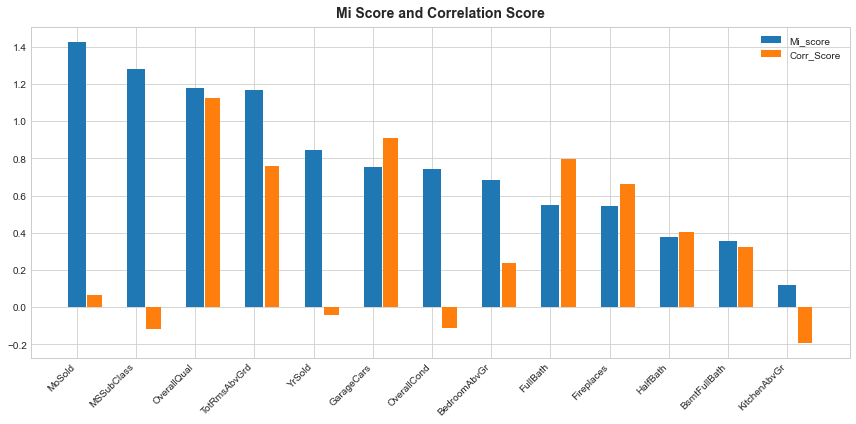

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

In [115]:
mi_score_and_corr(df=train,cols=num_cat,target_col='SalePrice',fill_na=0)

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

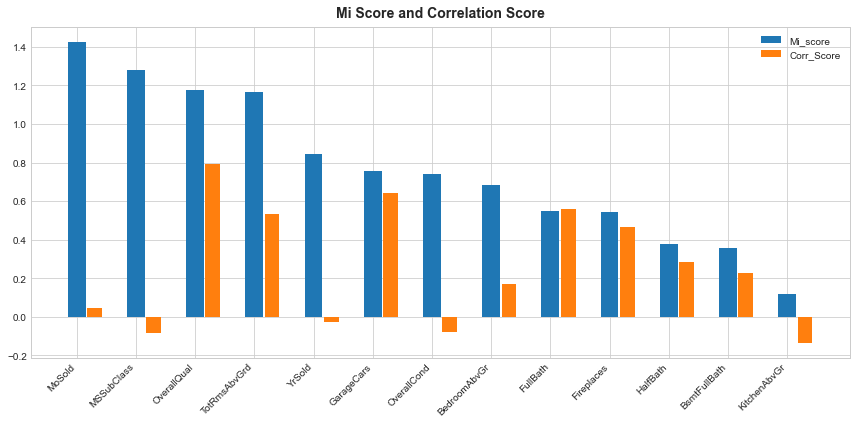

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

In [118]:
mi_score_and_corr(df=train,cols=num_cat,target_col='SalePrice',fill_na=0)

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

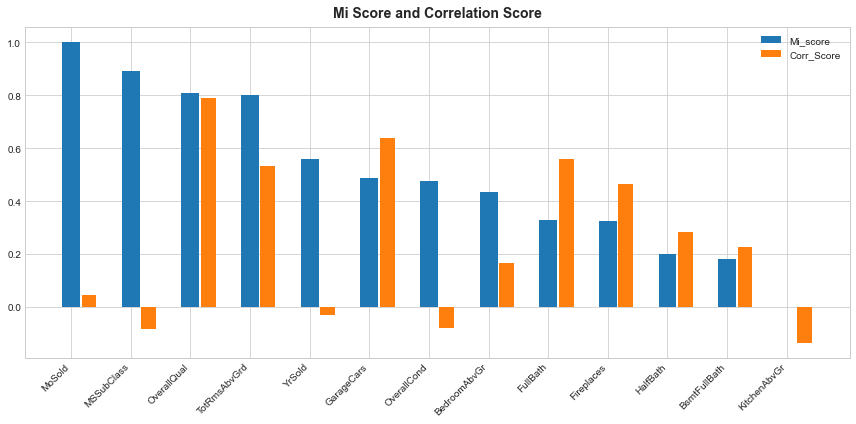

mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

In [120]:
mi_score_and_corr(df=train,cols=num_cat,target_col='SalePrice',fill_na=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


mi_score  Corr_Score
MoSold        1.422846    0.046432
MSSubClass    1.281812   -0.084284
OverallQual   1.175989    0.790982
TotRmsAbvGrd  1.166100    0.533723
YrSold        0.847030   -0.028923
GarageCars    0.755562    0.640409
OverallCond   0.742182   -0.077856
BedroomAbvGr  0.685355    0.168213
FullBath      0.549952    0.560664
Fireplaces    0.543726    0.466929
HalfBath      0.379421    0.284108
BsmtFullBath  0.354872    0.227122
KitchenAbvGr  0.119028   -0.135907

MoSold
Mi Score:  1.422846232099755   || Corr Score:  0.04643224522381939


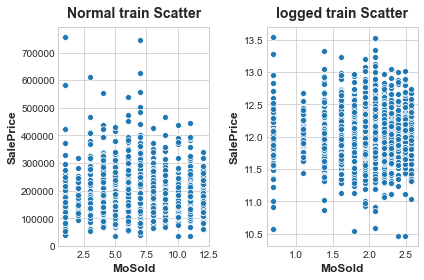

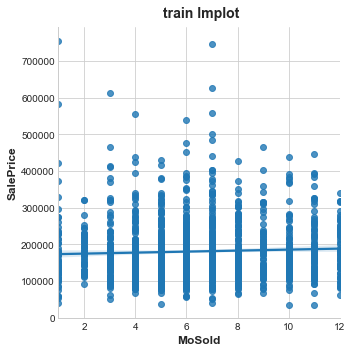

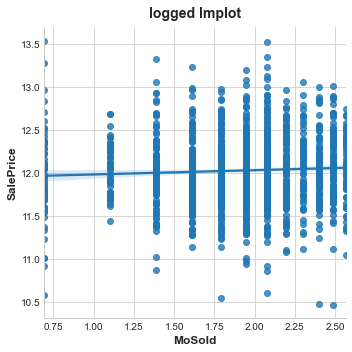



MSSubClass
Mi Score:  1.2818121163667624   || Corr Score:  -0.08428413512659526


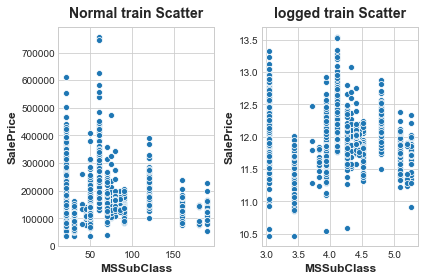

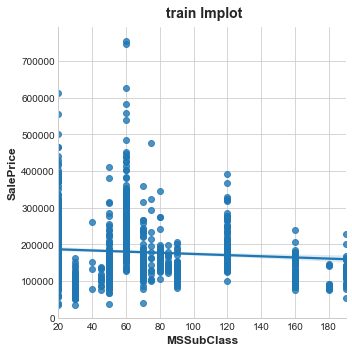

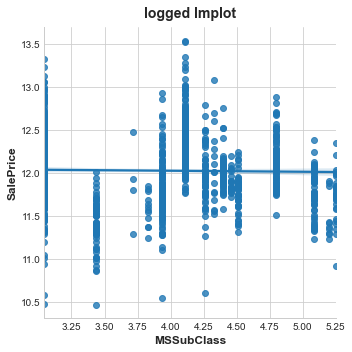



OverallQual
Mi Score:  1.1759891683036239   || Corr Score:  0.7909816005838048


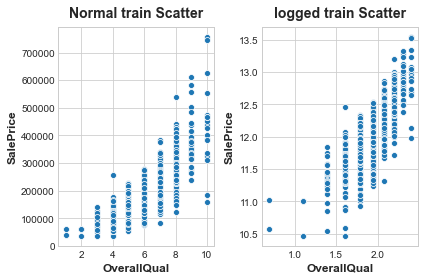

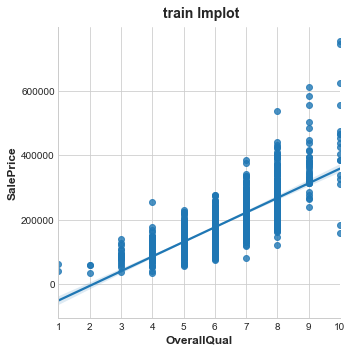

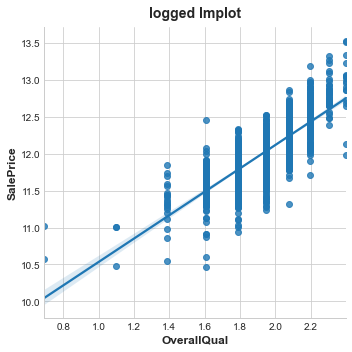



TotRmsAbvGrd
Mi Score:  1.1660998975588737   || Corr Score:  0.5337231555820284


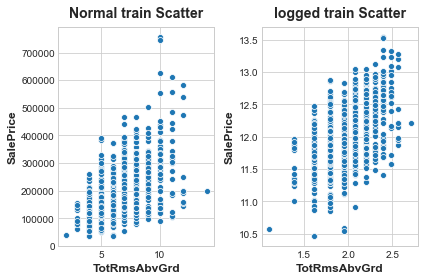

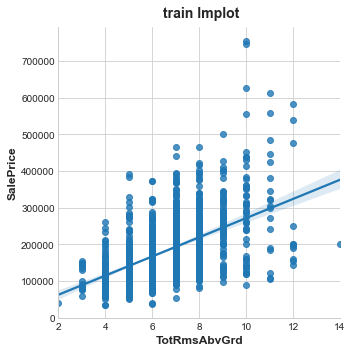

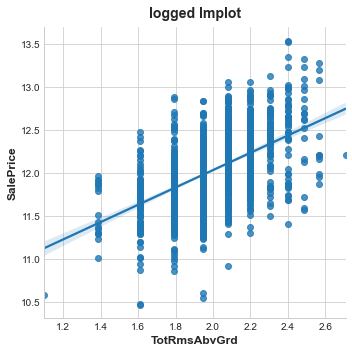



YrSold
Mi Score:  0.8470304475171968   || Corr Score:  -0.02892258516873034


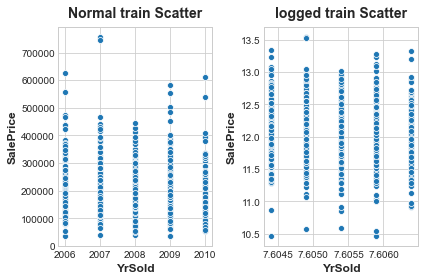

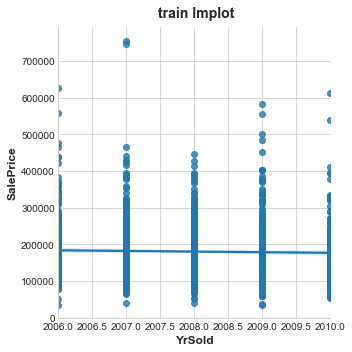

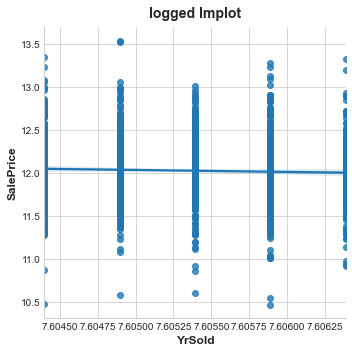



GarageCars
Mi Score:  0.7555623982260918   || Corr Score:  0.6404091972583531


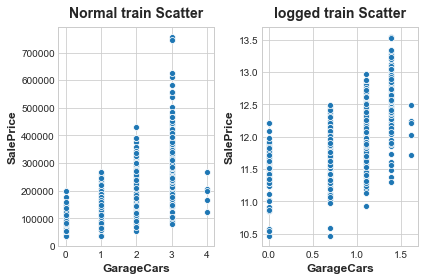

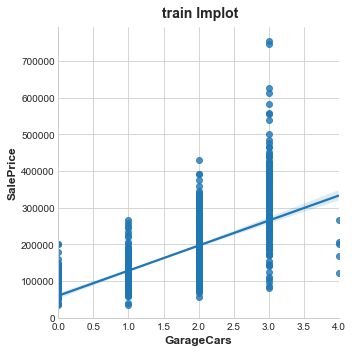

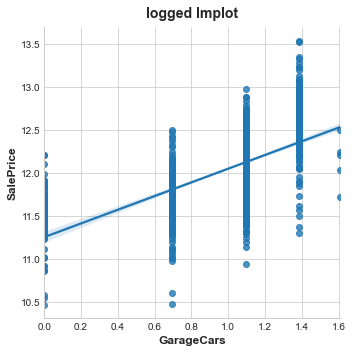



OverallCond
Mi Score:  0.7421824164050377   || Corr Score:  -0.077855894048678


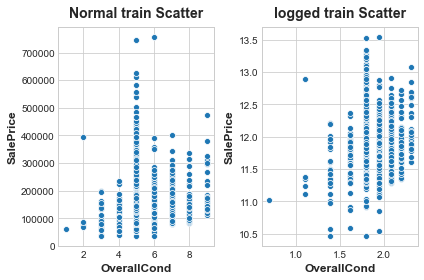

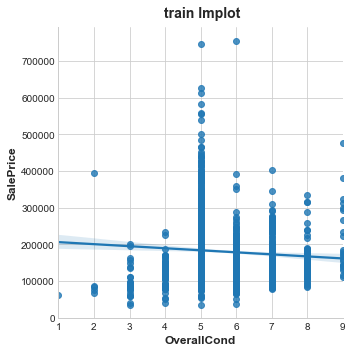

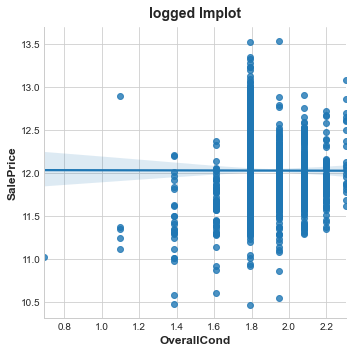



BedroomAbvGr
Mi Score:  0.6853554589659866   || Corr Score:  0.16821315430073996


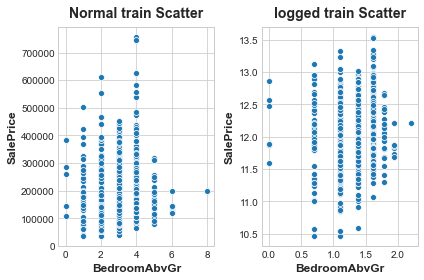

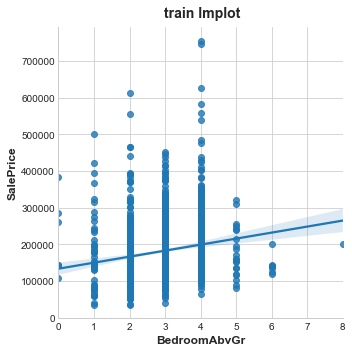

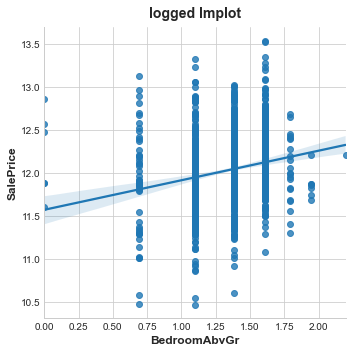



FullBath
Mi Score:  0.5499523994617983   || Corr Score:  0.5606637627484456


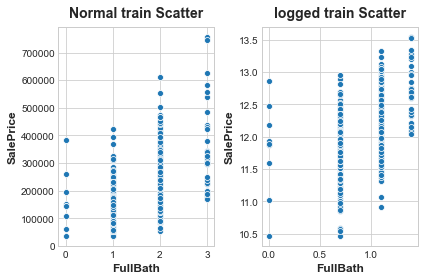

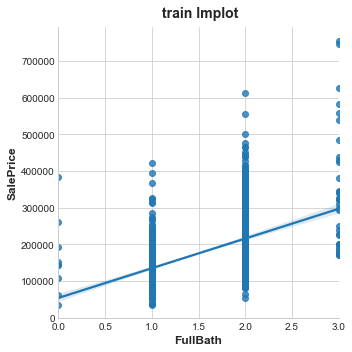

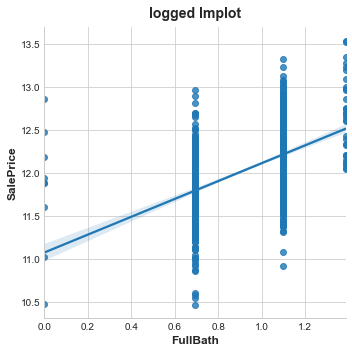



Fireplaces
Mi Score:  0.5437257069287   || Corr Score:  0.46692883675152763


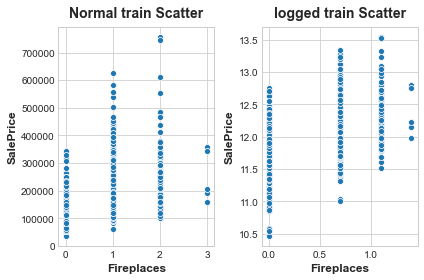

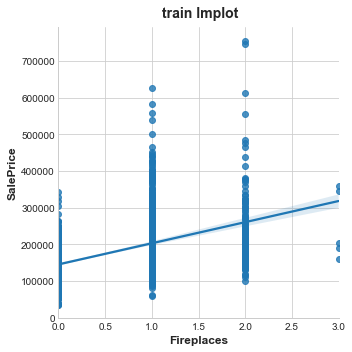

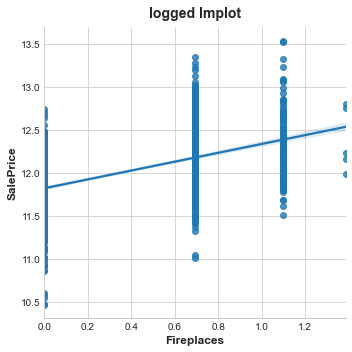



HalfBath
Mi Score:  0.3794213444601428   || Corr Score:  0.2841076755947829


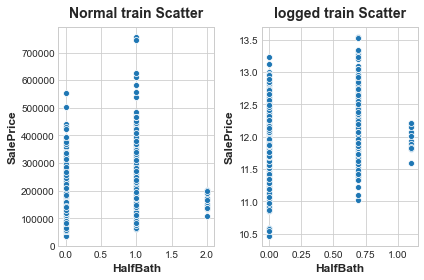

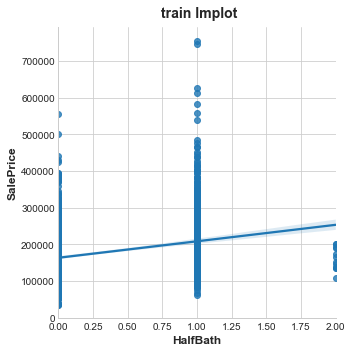

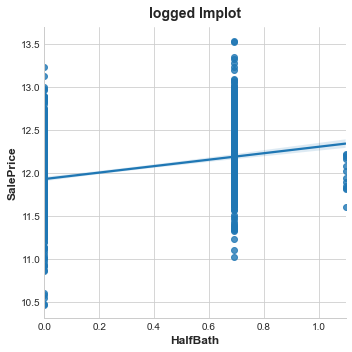



BsmtFullBath
Mi Score:  0.3548722888962236   || Corr Score:  0.22712223313149404


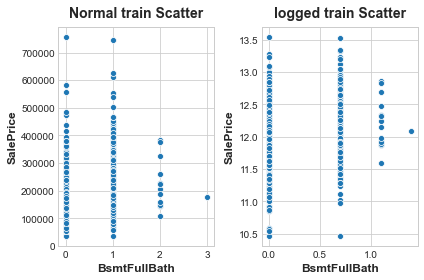

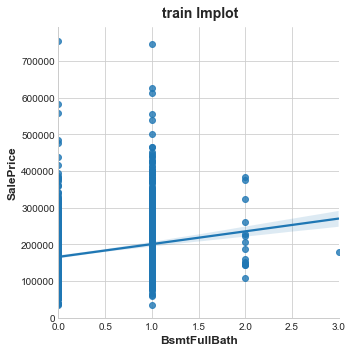

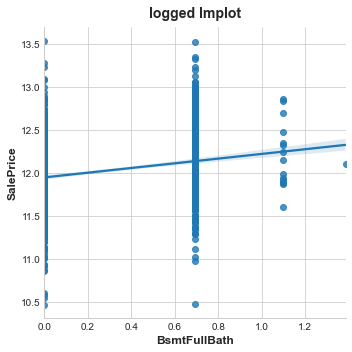



KitchenAbvGr
Mi Score:  0.11902761035276407   || Corr Score:  -0.1359073708421411


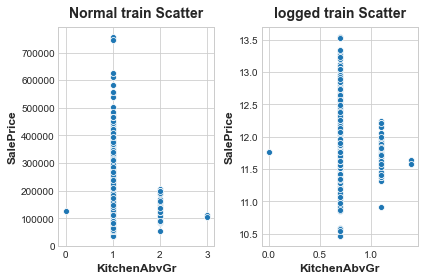

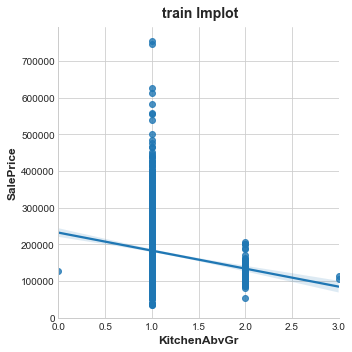

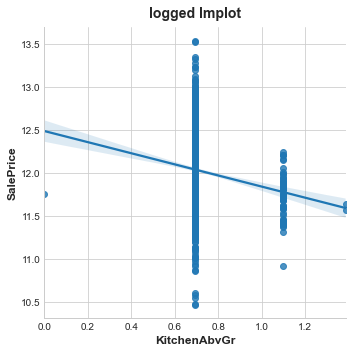

In [64]:
plot_mutual_info_and_corr(df=train,cols=num_cat,target_col='SalePrice',fill_na=-9.0)

## Continous Variable

In [9]:
continous = nums_train.drop(num_cat)

mi_score  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.260215
LotFrontage    2.773120    0.104201
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.469327
EnclosedPorch  0.786388   -0.128578
BsmtFinSF2     0.689628   -0.011378
ScreenPorch    0.459365    0.111447
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

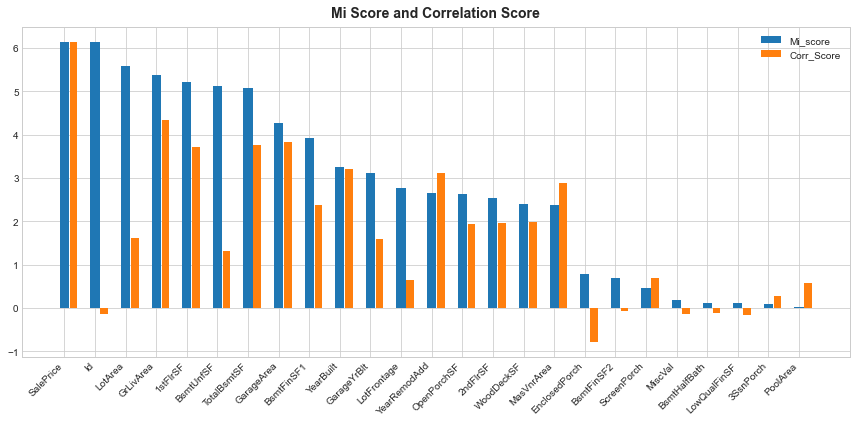

mi_score  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.260215
LotFrontage    2.773120    0.104201
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.469327
EnclosedPorch  0.786388   -0.128578
BsmtFinSF2     0.689628   -0.011378
ScreenPorch    0.459365    0.111447
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

In [116]:
mi_score_and_corr(df=train,cols=continous,target_col='SalePrice',fill_na=-99)

mi_score  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.260215
LotFrontage    2.773120    0.104201
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.469327
EnclosedPorch  0.786388   -0.128578
BsmtFinSF2     0.689628   -0.011378
ScreenPorch    0.459365    0.111447
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

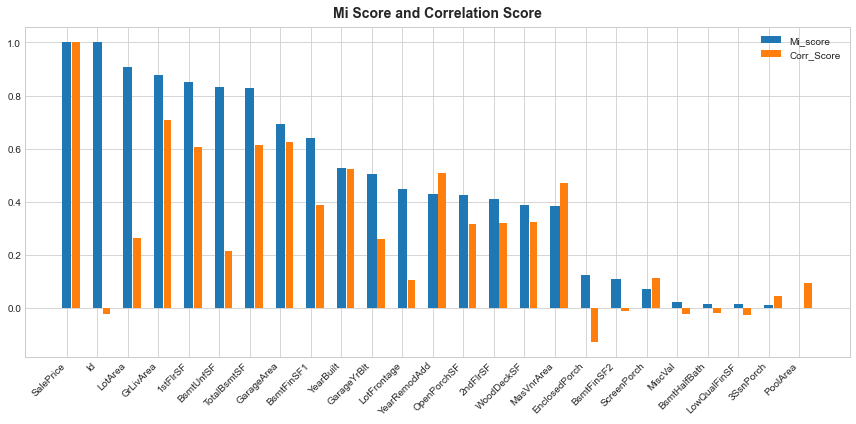

mi_score  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.260215
LotFrontage    2.773120    0.104201
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.469327
EnclosedPorch  0.786388   -0.128578
BsmtFinSF2     0.689628   -0.011378
ScreenPorch    0.459365    0.111447
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

In [121]:
mi_score_and_corr(df=train,cols=continous,target_col='SalePrice',fill_na=-99)

In [63]:
def plot_mutual_info_and_corr(df,cols,target_col,fill_na):
    df_def = df.copy()
    df_def = df_def.fillna(fill_na)
    def make_log(df_def,drop_target=False):
        df_log = df.copy()
        num_cols = df_log.select_dtypes(exclude='object').columns
        if drop_target == True:
            num_cols = num_cols.drop(target_col)
        numeric = df_log.select_dtypes(exclude='object')
        for col in num_cols:
            numeric.loc[:,col] = np.log(numeric[col]+1)
        return numeric 
    logged = make_log(df_def)
    
    #display(df_def.info())
    
    def mutual_info_price_score(series):
        return mutual_info_score(series,df_def[target_col])
    
    mi_normal = df_def[cols].apply(mutual_info_price_score)
    #mi_logged = logged[cols].apply(mutual_info_price_score)
    
    #display(mi_normal.sort_values(ascending=False))
    
    features = mi_normal.sort_values(ascending=False).index.to_list()
    scores = mi_normal.sort_values(ascending=False).values
    #correlation
    correlation = df_def[cols].corrwith(df_def[target_col])
    mi_corr_df = pd.DataFrame(scores,index=features,columns=['mi_score'])
    mi_corr_df['Corr_Score']= [correlation[col] for col in features ]
    
    #display(correlation)
    print()
    display(mi_corr_df)
    for col,score in zip(features,scores):
        print(col)
        print("Mi Score: ",score,"  || Corr Score: ",correlation[col])
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=col, y="SalePrice", data=df_def)
        plt.title("Normal train Scatter")
        
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=col, y="SalePrice", data=logged)
        plt.title("logged train Scatter")
        plt.tight_layout()
        
        sns.lmplot(x=col, y="SalePrice", data=df_def)
        plt.title(" train lmplot")
        
        sns.lmplot(x=col, y="SalePrice", data=logged)
        plt.title("logged lmplot")
       
        plt.tight_layout()
        plt.show()
        print()
        print()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.261257
LotFrontage    2.773120    0.193997
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.472347
EnclosedPorch  0.786388   -0.128578
BsmtFinSF2     0.689628   -0.011378
ScreenPorch    0.459365    0.111447
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

SalePrice
Mi Score:  6.132836979765857   || Corr Score:  1.0


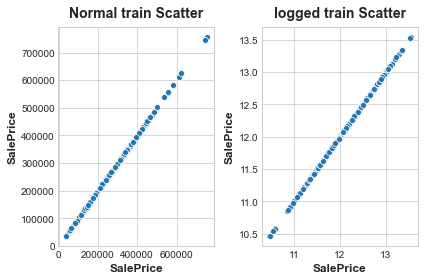

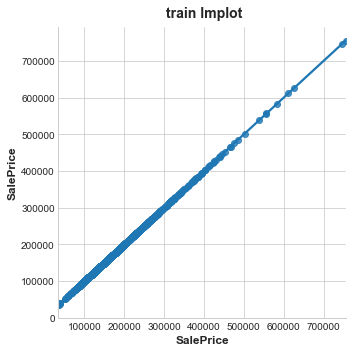

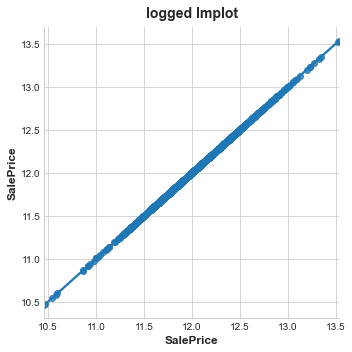



Id
Mi Score:  6.132836979765857   || Corr Score:  -0.02191671944343111


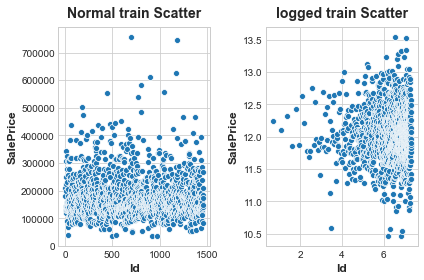

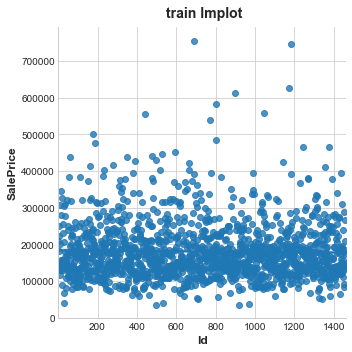

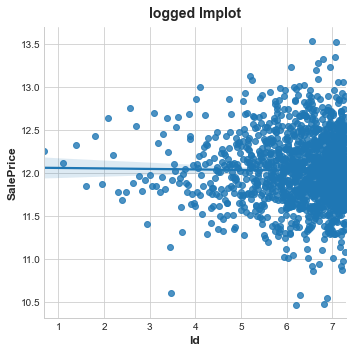



LotArea
Mi Score:  5.576920908652056   || Corr Score:  0.26384335387140573


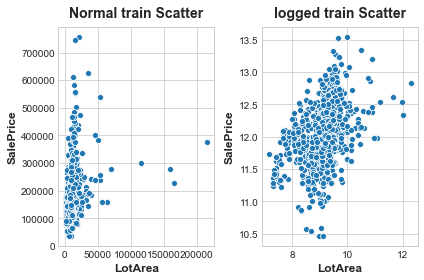

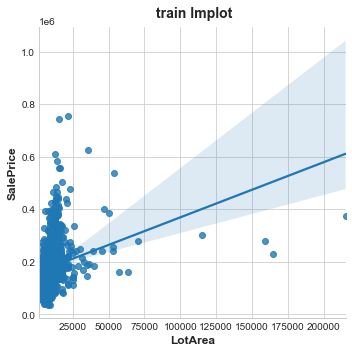

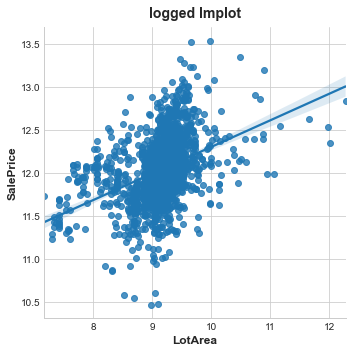



GrLivArea
Mi Score:  5.385649737431928   || Corr Score:  0.7086244776126522


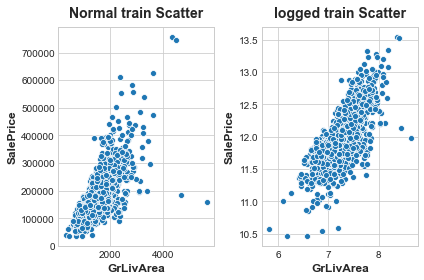

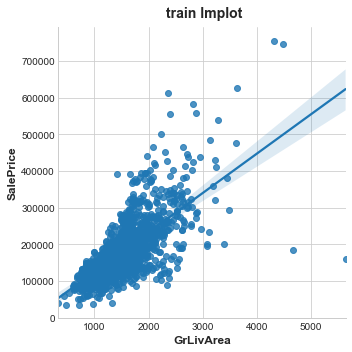

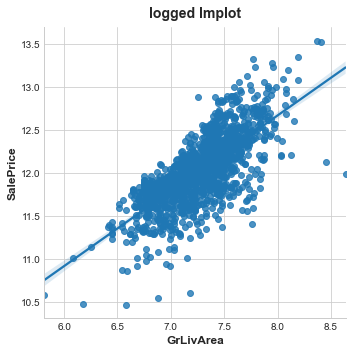



1stFlrSF
Mi Score:  5.228554426581789   || Corr Score:  0.6058521846919147


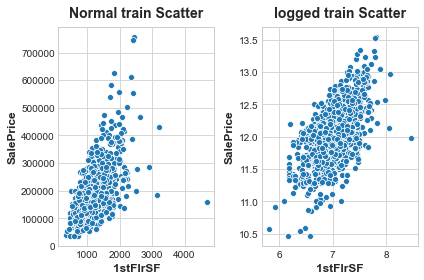

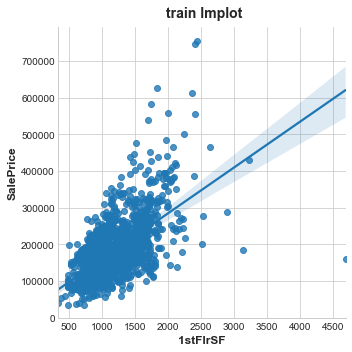

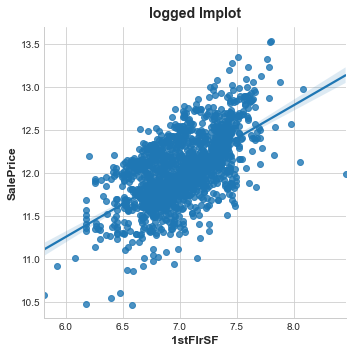



BsmtUnfSF
Mi Score:  5.118455696475062   || Corr Score:  0.21447910554696895


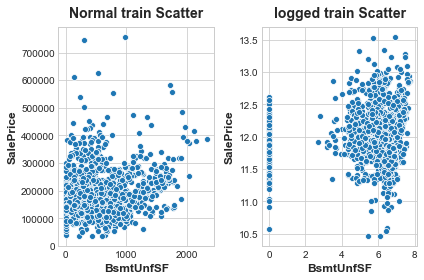

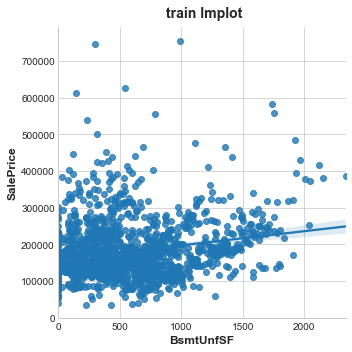

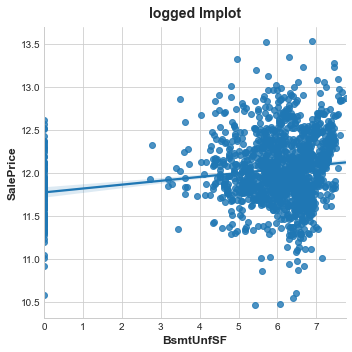



TotalBsmtSF
Mi Score:  5.081467656867101   || Corr Score:  0.6135805515591956


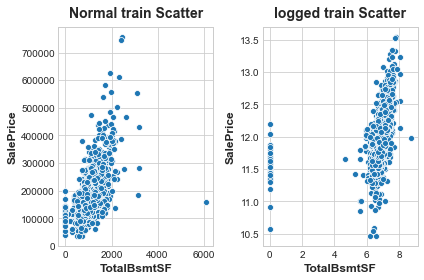

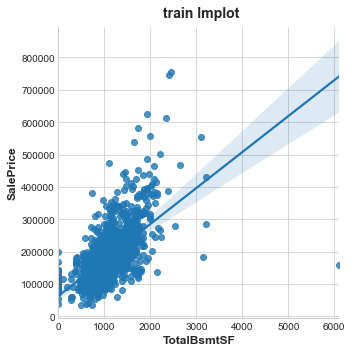

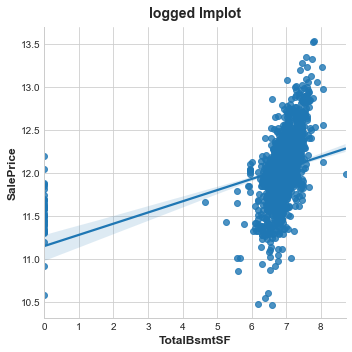



GarageArea
Mi Score:  4.2632500330554794   || Corr Score:  0.6234314389183617


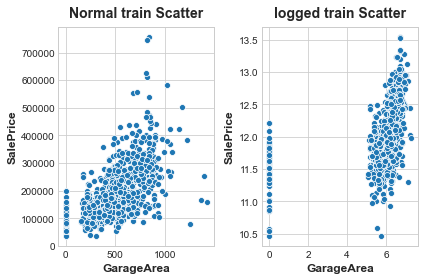

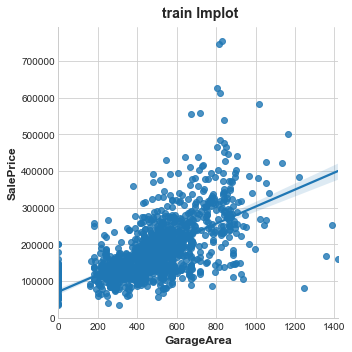

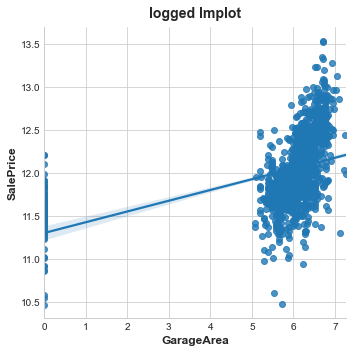



BsmtFinSF1
Mi Score:  3.9304503832320044   || Corr Score:  0.38641980624215316


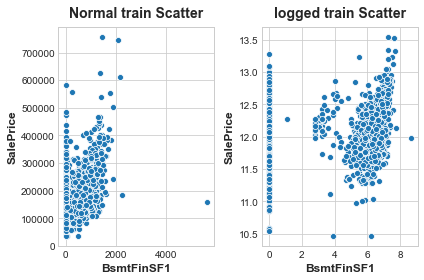

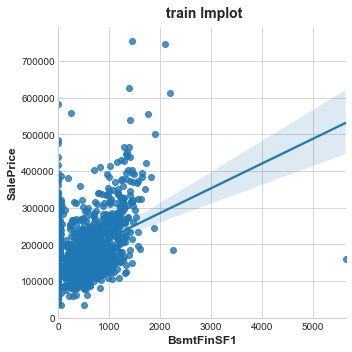

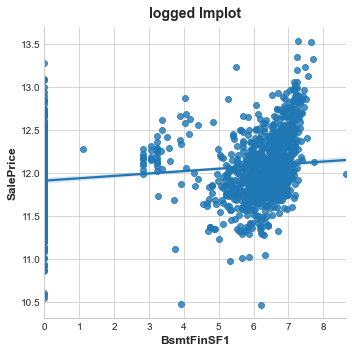



YearBuilt
Mi Score:  3.253142347725545   || Corr Score:  0.5228973328794969


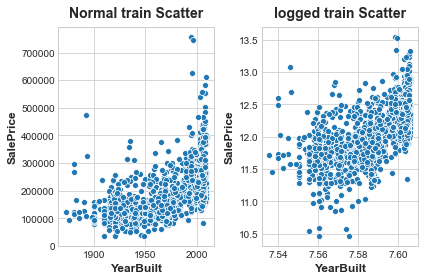

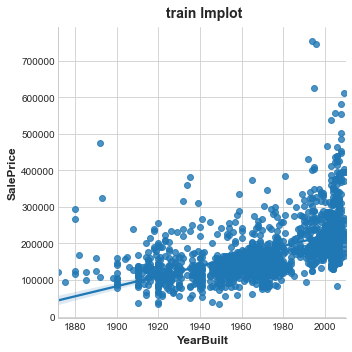

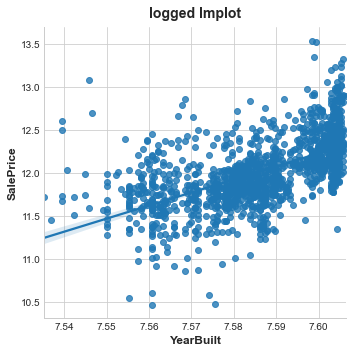



GarageYrBlt
Mi Score:  3.11673254724502   || Corr Score:  0.2612571354724748


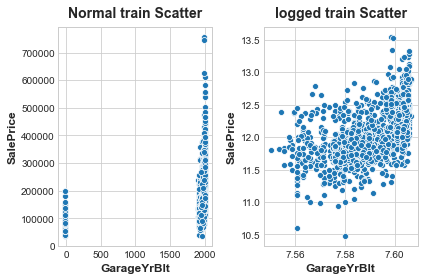

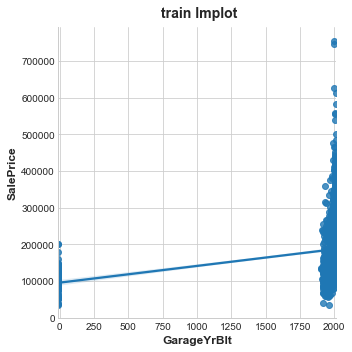

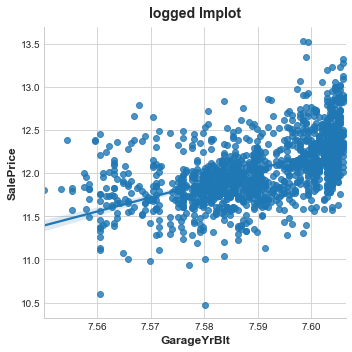



LotFrontage
Mi Score:  2.7731204351292646   || Corr Score:  0.19399745428509327


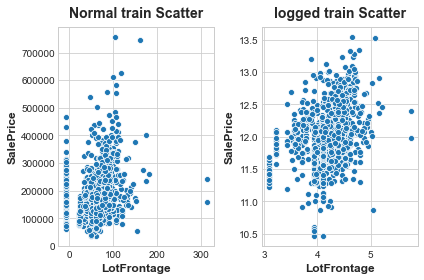

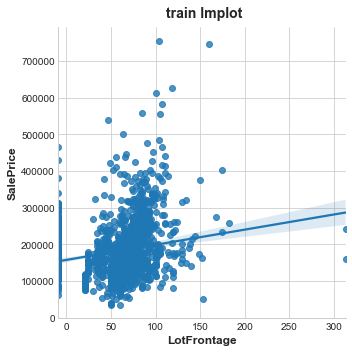

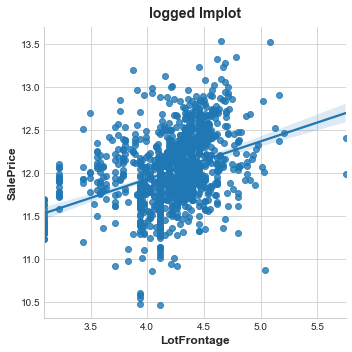



YearRemodAdd
Mi Score:  2.65524734606956   || Corr Score:  0.5071009671113864


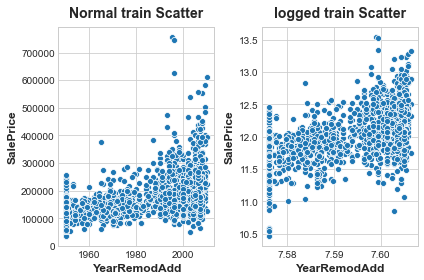

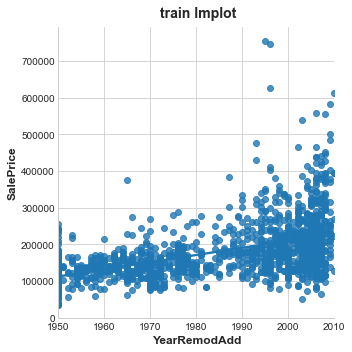

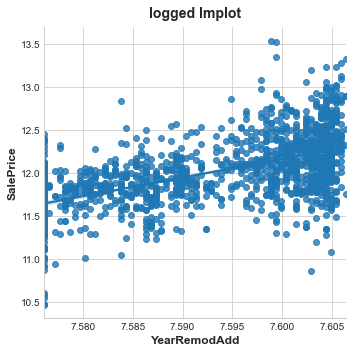



OpenPorchSF
Mi Score:  2.634046421219561   || Corr Score:  0.31585622711605543


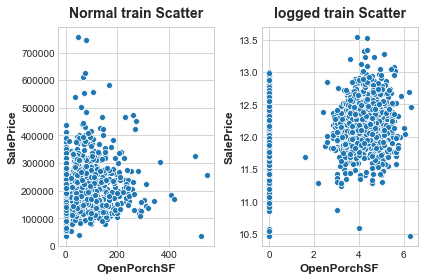

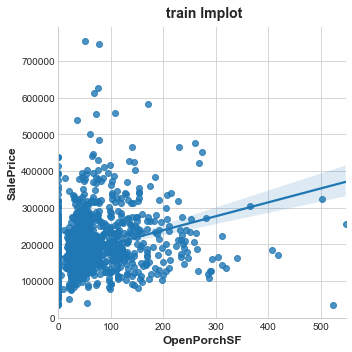

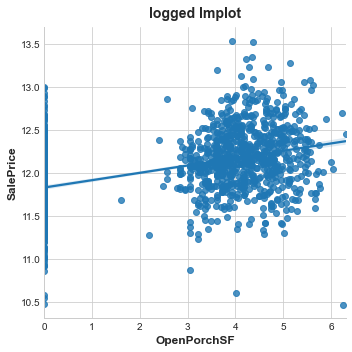



2ndFlrSF
Mi Score:  2.545305471074159   || Corr Score:  0.3193338028320677


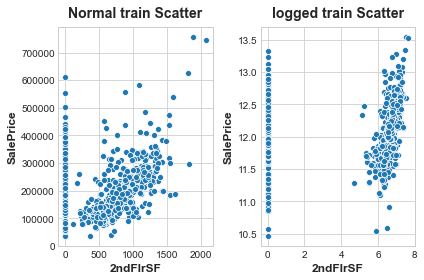

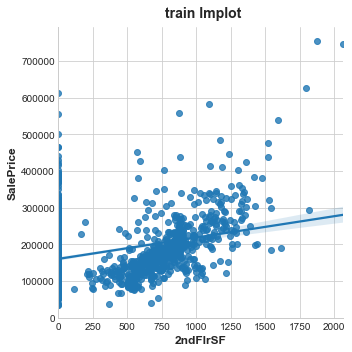

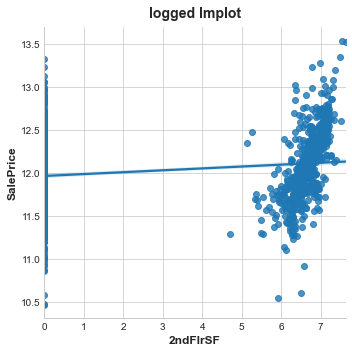



WoodDeckSF
Mi Score:  2.4077256971170415   || Corr Score:  0.3244134445681295


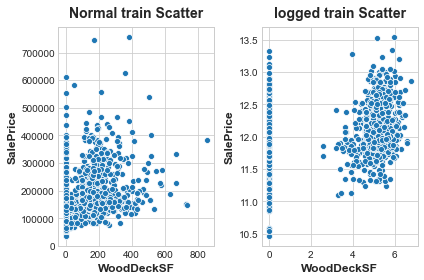

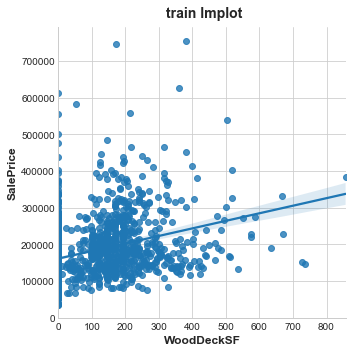

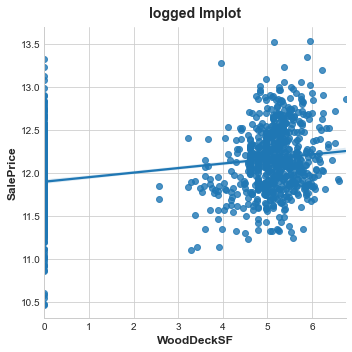



MasVnrArea
Mi Score:  2.371858584622926   || Corr Score:  0.47234674925277853


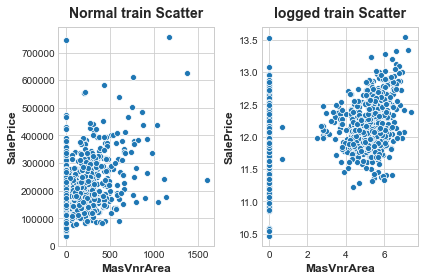

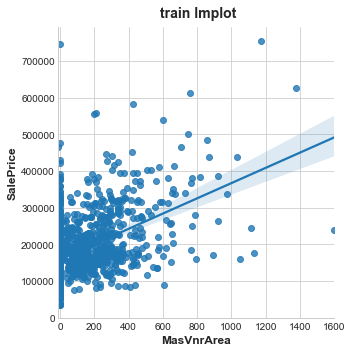

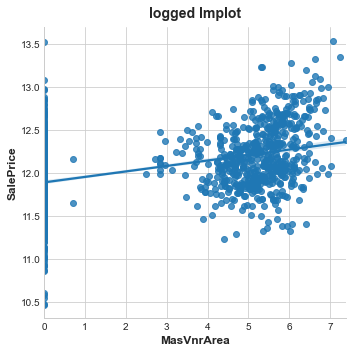



EnclosedPorch
Mi Score:  0.7863881477919117   || Corr Score:  -0.1285779579259565


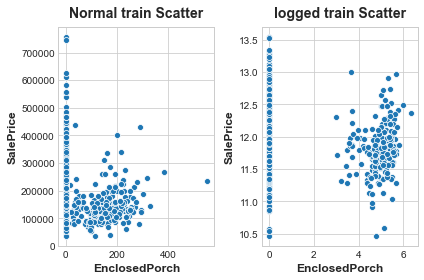

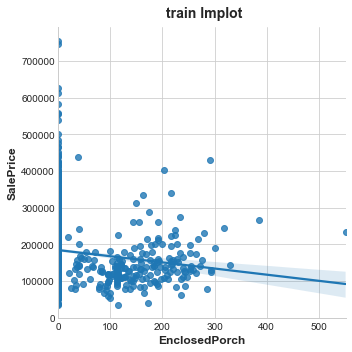

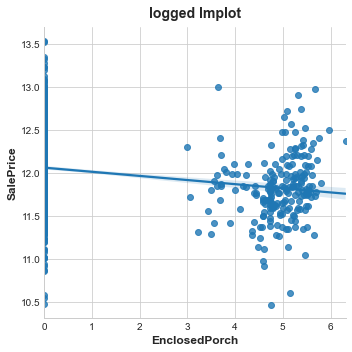



BsmtFinSF2
Mi Score:  0.6896277000144533   || Corr Score:  -0.011378121450215136


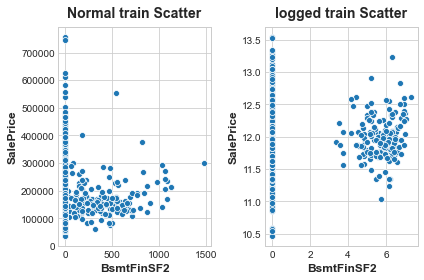

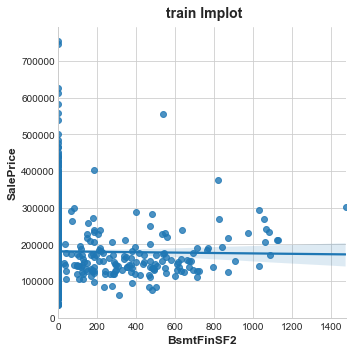

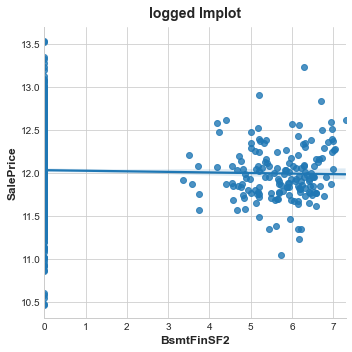



ScreenPorch
Mi Score:  0.45936457014944165   || Corr Score:  0.1114465711429111


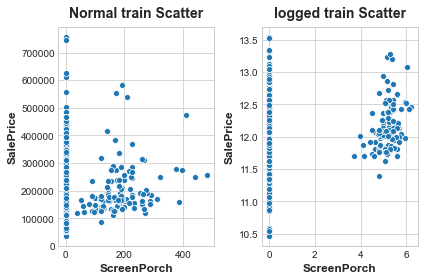

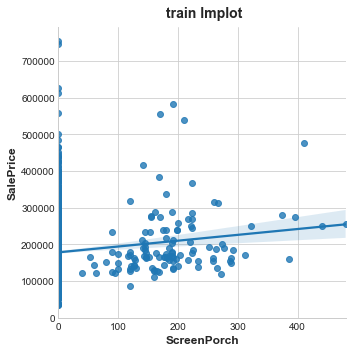

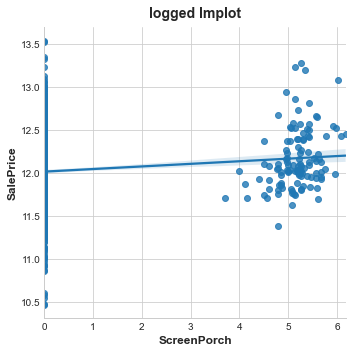



MiscVal
Mi Score:  0.17963555717992374   || Corr Score:  -0.021189579640303245


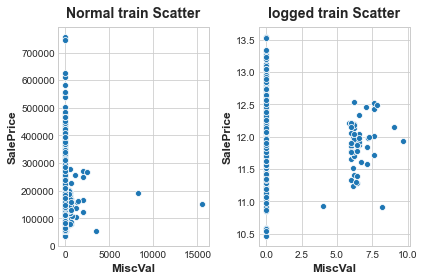

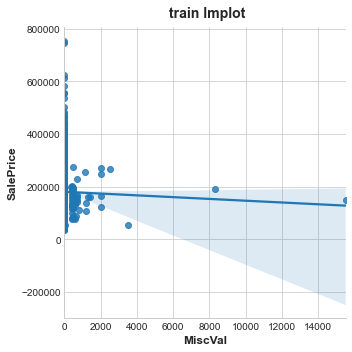

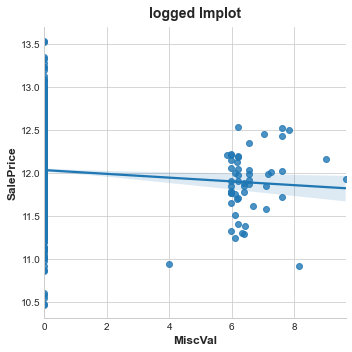



BsmtHalfBath
Mi Score:  0.12367836622059006   || Corr Score:  -0.01684415429735902


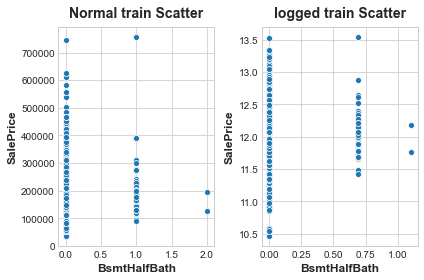

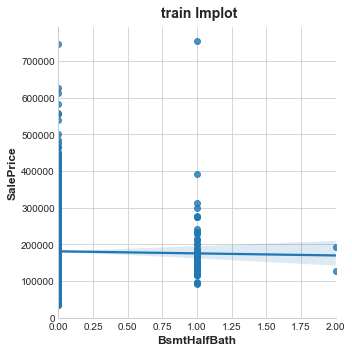

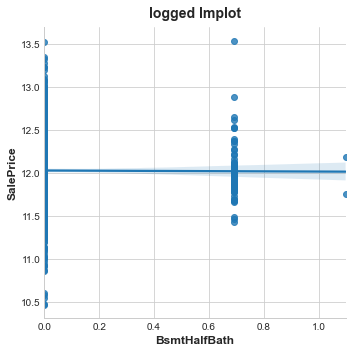



LowQualFinSF
Mi Score:  0.11332590053224556   || Corr Score:  -0.02560613000067959


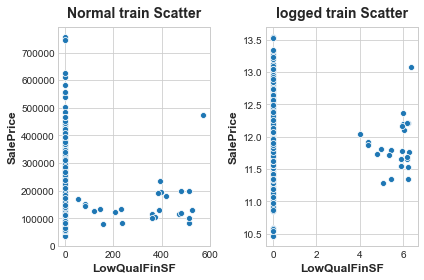

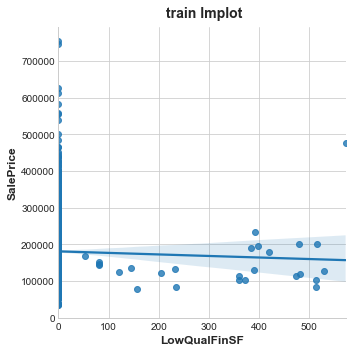

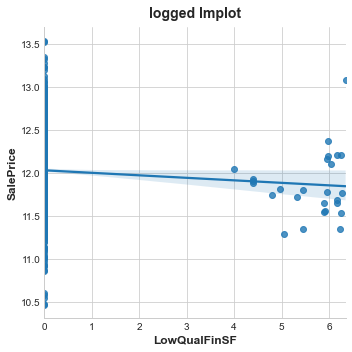



3SsnPorch
Mi Score:  0.09758506873012267   || Corr Score:  0.04458366533574845


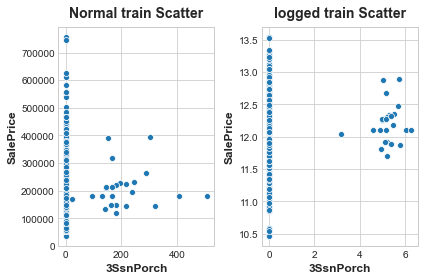

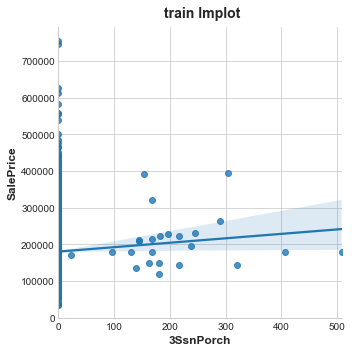

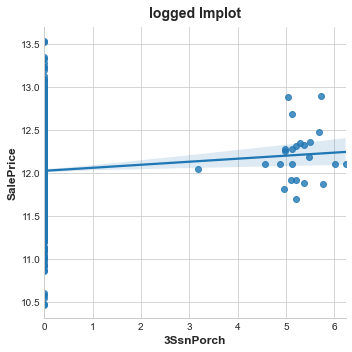



PoolArea
Mi Score:  0.029648425094111693   || Corr Score:  0.09240354949187317


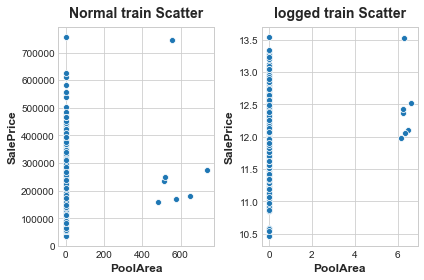

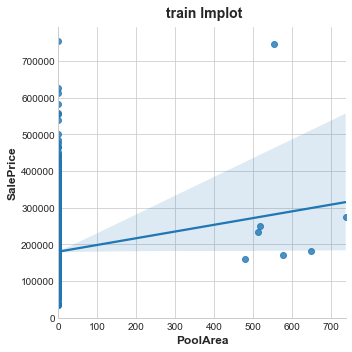

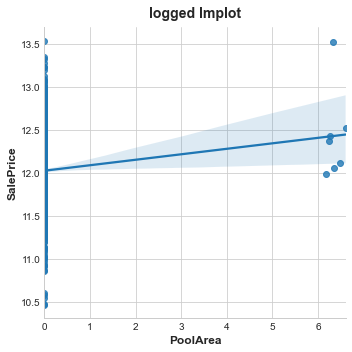

In [44]:
plot_mutual_info_and_corr(df=train,cols=continous.to_list(),target_col='SalePrice',fill_na=-9.0)

In [61]:
mi_score_and_corr(df=train,cols=nums_train,target_col='SalePrice',fill_na=-99)

mi_score  Corr_Score
SalePrice      6.132837    1.000000
Id             6.132837   -0.021917
LotArea        5.576921    0.263843
GrLivArea      5.385650    0.708624
1stFlrSF       5.228554    0.605852
BsmtUnfSF      5.118456    0.214479
TotalBsmtSF    5.081468    0.613581
GarageArea     4.263250    0.623431
BsmtFinSF1     3.930450    0.386420
YearBuilt      3.253142    0.522897
GarageYrBlt    3.116733    0.260215
LotFrontage    2.773120    0.104201
YearRemodAdd   2.655247    0.507101
OpenPorchSF    2.634046    0.315856
2ndFlrSF       2.545305    0.319334
WoodDeckSF     2.407726    0.324413
MasVnrArea     2.371859    0.469327
MoSold         1.422846    0.046432
MSSubClass     1.281812   -0.084284
OverallQual    1.175989    0.790982
TotRmsAbvGrd   1.166100    0.533723
YrSold         0.847030   -0.028923
EnclosedPorch  0.786388   -0.128578
GarageCars     0.755562    0.640409
OverallCond    0.742182   -0.077856
BsmtFinSF2     0.689628   -0.011378
BedroomAbvGr   0.685355    0.168213
FullBath       0.549952    0.560664
Fireplaces     0.543726    0.466929
ScreenPorch    0.459365    0.111447
HalfBath       0.379421    0.284108
BsmtFullBath   0.354872    0.227122
MiscVal        0.179636   -0.021190
BsmtHalfBath   0.123678   -0.016844
KitchenAbvGr   0.119028   -0.135907
LowQualFinSF   0.113326   -0.025606
3SsnPorch      0.097585    0.044584
PoolArea       0.029648    0.092404

#### so what does this tells us??
##### Mutual_Info:
    * scores the features that helps in predicting the target column

##### Corr_Score
    Range |  Relationship_Strengh | Inference

* 0.0 to -0.2 or 0.0 to 0.2 = LOW = RARELY
* -0.2 to -0.5 or 0.2 to 0.5 = MODERATE = SOMETIMES
* -0.6 to -1.0 or 0.6 to 1.0 = STRONG = OFTEN

In [77]:
def mi_score(df,cols,target_col,fill_na):
    df_def = df.copy()
    df_def = df_def.fillna(fill_na)
    
    def mutual_info_price_score(series):
        return mutual_info_score(series,df_def[target_col])
    
    mi_normal = df_def[cols].apply(mutual_info_price_score)
    features = mi_normal.sort_values(ascending=False).index.to_list()
    scores = mi_normal.sort_values(ascending=False).values

    mi_corr_df = pd.DataFrame(scores,index=features,columns=['mi_score'])
    display(mi_corr_df)
    print()
    plt.rc("figure",figsize=(12,6))
    sns.barplot(np.arange(0,mi_corr_df.shape[0]),mi_corr_df['mi_score'])
    
    ticks = list(range((mi_corr_df.shape[0]))) # points on the x axis where you want the label to appear
    labels=mi_corr_df.index
    plt.xticks(ticks, labels);
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title("Mi Score")
    plt.show()

Neighborhood  Exterior2nd  Exterior1st  BsmtFinType1  FireplaceQu  \
mi_score      2.003888     1.172542     1.116941      0.961786     0.752668   

          GarageFinish  BsmtQual  HouseStyle  KitchenQual  GarageType  ...  \
mi_score      0.752268   0.74708     0.72122     0.676428    0.673624  ...   

             Alley  CentralAir  LandSlope  MiscFeature   Heating  RoofMatl  \
mi_score  0.166222    0.157975   0.149264     0.107683  0.095034   0.08217   

          Condition2    PoolQC    Street  Utilities  
mi_score     0.05525  0.025492  0.021418   0.003824  

[1 rows x 43 columns]

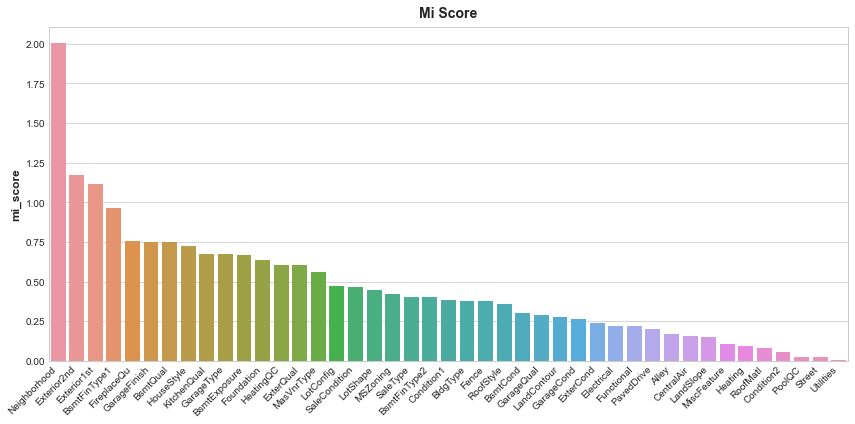

In [76]:
mi_score(df=train,cols=cats_train,target_col='SalePrice',fill_na='missing')

In [122]:
!pip install dython

  Using cached numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\compat\\py3k.py'
Consider using the `--user` option or check the permissions.

